In [ ]:
# Importação

In [248]:
# importando as bibliotecas e classes
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.decomposition import FactorAnalysis
%matplotlib inline

#rcParams['figure.figsize'] = 5,4
#sns.set_style('whitegrid')

In [ ]:
#Carregando dados

In [2]:
#importando dados
tabela_areas_desmatadas = pd.read_csv("def_area_2004_2019.csv")
tabela_areas_queimadas = pd.read_csv("inpe_brazilian_amazon_fires_1999_2019.csv")

In [3]:
#criando uma dataframe
#Criando uma dataframe pelo arquivo
df_desmatadas = pd.DataFrame(tabela_areas_desmatadas)
df_queimadas = pd.DataFrame(tabela_areas_queimadas)


In [4]:
df_desmatadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano/Estados  18 non-null     int64  
 1   AC           17 non-null     float64
 2   AM           17 non-null     float64
 3   AP           17 non-null     float64
 4   MA           17 non-null     float64
 5   MT           17 non-null     float64
 6   PA           17 non-null     float64
 7   RO           17 non-null     float64
 8   RR           17 non-null     float64
 9   TO           17 non-null     float64
 10  AMZ LEGAL    17 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.7 KB


In [5]:
df_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [6]:
df_desmatadas.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
1,2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2,2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
3,2007,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
4,2008,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0


In [7]:
df_queimadas.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [8]:
#identificar valores nulos e somar
df_desmatadas.isnull().sum()

Ano/Estados    0
AC             1
AM             1
AP             1
MA             1
MT             1
PA             1
RO             1
RR             1
TO             1
AMZ LEGAL      1
dtype: int64

In [9]:
#identificar valores nulos e somar
df_queimadas.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

In [10]:
#Alterar os valores nulos para 0
df_desmatadas_preenchido = df_desmatadas.fillna(0)

In [11]:
#Pesquisar se existe valores em Branco
df_desmatadas_preenchido.isnull()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Verificar duplicados
df_desmatadas_preenchido.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
dtype: bool

In [13]:
df_queimadas.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2099    False
2100    False
2101    False
2102    False
2103    False
Length: 2104, dtype: bool

In [ ]:
#remover duplicados

In [14]:
df_desmatadas_remover_duplicadas = df_desmatadas_preenchido.drop_duplicates()

In [15]:
df_desmatadas_remover_duplicadas.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [16]:
df_desmatadas_remover_duplicadas

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
1,2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2,2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
3,2007,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
4,2008,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0
5,2009,167.0,405.0,70.0,828.0,1049.0,4281.0,482.0,121.0,61.0,7464.0
6,2010,259.0,595.0,53.0,712.0,871.0,3770.0,435.0,256.0,49.0,7000.0
7,2011,280.0,502.0,66.0,396.0,1120.0,3008.0,865.0,141.0,40.0,6418.0
8,2012,305.0,523.0,27.0,269.0,757.0,1741.0,773.0,124.0,52.0,4571.0
9,2013,221.0,583.0,23.0,403.0,1139.0,2346.0,932.0,170.0,74.0,5891.0


In [ ]:
#Ajustes dos dados

In [17]:
df_queimadas_rename = df_queimadas.rename(columns= {'year':'Ano/Estados', 'month':'mês','firespots':'queimadas'})

In [18]:
df_queimadas_rename.tail()

,Ano/Estados,mês,state,latitude,longitude,queimadas
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27
2103,2019,12,TOCANTINS,-6.769381,-48.475667,21


In [19]:
df_queimadas_sem_mes_lat_long = df_queimadas_rename.drop(['mês','latitude','longitude'],axis=1)

In [20]:
df_queimadas_sem_mes_lat_long.head(10)

,Ano/Estados,state,queimadas
0,1999,AMAZONAS,3
1,1999,MARANHAO,36
2,1999,MATO GROSSO,18
3,1999,PARA,87
4,1999,RONDONIA,1
5,1999,RORAIMA,15
6,1999,AMAPA,1
7,1999,AMAZONAS,43
8,1999,MATO GROSSO,8
9,1999,PARA,285


In [21]:
df_queimadas_group_by = df_queimadas_sem_mes_lat_long.groupby(['Ano/Estados','state']).sum().reset_index()

In [22]:
df_queimadas_group_by.head(20)

,Ano/Estados,state,queimadas
0,1999,ACRE,347
1,1999,AMAPA,101
2,1999,AMAZONAS,1048
3,1999,MARANHAO,4136
4,1999,MATO GROSSO,28538
5,1999,PARA,20478
6,1999,RONDONIA,7121
7,1999,RORAIMA,220
8,1999,TOCANTINS,869
9,2000,ACRE,430


In [23]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="ALAGOAS",'SIGLA']="AL"

In [24]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="ACRE",'SIGLA']="AC"

In [25]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="AMAPA",'SIGLA']="AP"

In [26]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="AMAZONAS",'SIGLA']="AM"

In [27]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="BAHIA",'SIGLA']="BA"

In [28]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="CEARA",'SIGLA']="CE"

In [29]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="DISTRITO FEDERAL",'SIGLA']="DF"

In [30]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="ESPIRITO SANTO",'SIGLA']="ES"

In [31]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="GOIAS",'SIGLA']="GO"

In [32]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MARANHAO",'SIGLA']="MA"

In [33]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MATO GROSSO",'SIGLA']="MT"

In [34]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MATO GROSSO DO SUL",'SIGLA']="MS"

In [35]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="TOCANTINS",'SIGLA']="TO"

In [36]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="RORAIMA",'SIGLA']="RR"

In [37]:
 df_queimadas_group_by.loc[df_queimadas_group_by['state']=="RONDONIA",'SIGLA']="RO"

In [38]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="PARA",'SIGLA']="PA"

In [39]:
 df_queimadas_group_by.head(100)

,Ano/Estados,state,queimadas,SIGLA
0,1999,ACRE,347,AC
1,1999,AMAPA,101,AP
2,1999,AMAZONAS,1048,AM
3,1999,MARANHAO,4136,MA
4,1999,MATO GROSSO,28538,MT
...,...,...,...,...
95,2009,PARA,41664,PA
96,2009,RONDONIA,5396,RO
97,2009,RORAIMA,2359,RR
98,2009,TOCANTINS,382,TO


In [40]:
df_queimadas_group_by[['Ano/Estados','SIGLA','state','queimadas']]

,Ano/Estados,SIGLA,state,queimadas
0,1999,AC,ACRE,347
1,1999,AP,AMAPA,101
2,1999,AM,AMAZONAS,1048
3,1999,MA,MARANHAO,4136
4,1999,MT,MATO GROSSO,28538
...,...,...,...,...
184,2019,MT,MATO GROSSO,17479
185,2019,PA,PARA,29700
186,2019,RO,RONDONIA,11206
187,2019,RR,RORAIMA,4775


In [ ]:
#df_queimadas_group_by = df_queimadas_group_by.drop(['state'],axis=1)

In [41]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="AMAZONAS",'AM - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [42]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MARANHAO",'MA - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [43]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="ACRE",'AC - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [44]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="AMAPA",'AP - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [45]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MATO GROSSO",'MT - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [46]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="MATO GROSSO",'MT - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [47]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="PARA",'PA - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [48]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="RONDONIA",'RO - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [49]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="RORAIMA",'RR - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [50]:
df_queimadas_group_by.loc[df_queimadas_group_by['state']=="TOCANTINS",'TO - QTD QUEIMADAS']=df_queimadas_group_by['queimadas']

In [51]:
df_queimadas_group_by

,Ano/Estados,state,queimadas,SIGLA,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS
0,1999,ACRE,347,AC,NaN,NaN,347.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,AMAPA,101,AP,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN
2,1999,AMAZONAS,1048,AM,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,MARANHAO,4136,MA,NaN,4136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,MATO GROSSO,28538,MT,NaN,NaN,NaN,NaN,28538.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2019,MATO GROSSO,17479,MT,NaN,NaN,NaN,NaN,17479.0,NaN,NaN,NaN,NaN
185,2019,PARA,29700,PA,NaN,NaN,NaN,NaN,NaN,29700.0,NaN,NaN,NaN
186,2019,RONDONIA,11206,RO,NaN,NaN,NaN,NaN,NaN,NaN,11206.0,NaN,NaN
187,2019,RORAIMA,4775,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4775.0,NaN


In [52]:
novo_df_queimadas = df_queimadas_group_by.drop(['SIGLA','state','queimadas'],axis=1) 

In [53]:
novo_df_queimadas.head(20)

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS
0,1999,NaN,NaN,347.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN
2,1999,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,NaN,4136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,NaN,NaN,NaN,NaN,28538.0,NaN,NaN,NaN,NaN
5,1999,NaN,NaN,NaN,NaN,NaN,20478.0,NaN,NaN,NaN
6,1999,NaN,NaN,NaN,NaN,NaN,NaN,7121.0,NaN,NaN
7,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN
8,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869.0
9,2000,NaN,NaN,430.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
novo_df_queimadas_sum = novo_df_queimadas.groupby(['Ano/Estados']).sum().reset_index()

In [ ]:
#novo_df_queimadas_sum = novo_df_queimadas_sum.drop(['AL'],axis=1) 

In [55]:
novo_df_queimadas_sum.tail()

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS
16,2015,13419.0,7475.0,5779.0,2936.0,17599.0,43164.0,13105.0,2452.0,509.0
17,2016,11173.0,4928.0,7684.0,2595.0,15836.0,29724.0,11462.0,3870.0,489.0
18,2017,11685.0,5896.0,6295.0,1946.0,18143.0,49770.0,11298.0,1565.0,841.0
19,2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.0,10253.0,2383.0,281.0
20,2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.0,11206.0,4775.0,247.0


In [56]:
novo_df_queimadas_sum.set_index('Ano/Estados',inplace = True)

In [57]:
novo_df_queimadas_sum.tail()

,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS
Ano/Estados,,,,,,,,,
2015,13419.0,7475.0,5779.0,2936.0,17599.0,43164.0,13105.0,2452.0,509.0
2016,11173.0,4928.0,7684.0,2595.0,15836.0,29724.0,11462.0,3870.0,489.0
2017,11685.0,5896.0,6295.0,1946.0,18143.0,49770.0,11298.0,1565.0,841.0
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.0,10253.0,2383.0,281.0
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.0,11206.0,4775.0,247.0


In [ ]:
#criar index

#df_desmatadas.set_index('Ano/Estados',inplace = True)

In [58]:
#criar index
df_desmatadas_remover_duplicadas.set_index('Ano/Estados',inplace = True)

In [59]:
df_desmatadas_remover_duplicadas.tail()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2016,372.0,1129.0,17.0,258.0,1489.0,2992.0,1376.0,202.0,58.0,7893.0
2017,257.0,1001.0,24.0,265.0,1561.0,2433.0,1243.0,132.0,31.0,6947.0
2018,444.0,1045.0,24.0,253.0,1490.0,2744.0,1316.0,195.0,25.0,7536.0
2019,688.0,1421.0,8.0,215.0,1685.0,3862.0,1245.0,617.0,21.0,9762.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df_desmatadas_remover_duplicadas = df_desmatadas_remover_duplicadas.drop([2020])

In [61]:
df_desmatadas_remover_duplicadas

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
2007,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
2008,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0
2009,167.0,405.0,70.0,828.0,1049.0,4281.0,482.0,121.0,61.0,7464.0
2010,259.0,595.0,53.0,712.0,871.0,3770.0,435.0,256.0,49.0,7000.0
2011,280.0,502.0,66.0,396.0,1120.0,3008.0,865.0,141.0,40.0,6418.0
2012,305.0,523.0,27.0,269.0,757.0,1741.0,773.0,124.0,52.0,4571.0


In [ ]:
#df_queimadas_rename

In [ ]:
#df_queimadas_rename.set_index('Ano/Estados',inplace = True)

In [ ]:
#df_queimadas_rename

In [ ]:
#df_queimadas_drop = df_queimadas_rename.drop(columns=['latitude','longitude','mês'])

In [ ]:
#df_queimadas_anual_agrupado = df_queimadas_drop.groupby(['Ano/Estados','state']).sum()

In [ ]:
#df_queimadas_anual_agrupado

In [62]:
df_desmatadas_remover_duplicadas

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
2007,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
2008,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0
2009,167.0,405.0,70.0,828.0,1049.0,4281.0,482.0,121.0,61.0,7464.0
2010,259.0,595.0,53.0,712.0,871.0,3770.0,435.0,256.0,49.0,7000.0
2011,280.0,502.0,66.0,396.0,1120.0,3008.0,865.0,141.0,40.0,6418.0
2012,305.0,523.0,27.0,269.0,757.0,1741.0,773.0,124.0,52.0,4571.0


In [ ]:
#como concatenar dataframes?
pd.concat([df_desmatadas_remover_duplicadas,novo_df_queimadas_sum])

In [ ]:
pd.concat([df_desmatadas_remover_duplicadas,novo_df_queimadas_sum],axis=0)

In [ ]:
#df_queimadas_rename

In [ ]:
#df_queimadas_anual = df_queimadas_rename[['state','queimadas']]

In [ ]:
#df_queimadas_anual.filter(['state','queimadas'])

In [ ]:
#df_queimadas_anual_rename = df_queimadas_anual.rename(columns={'state': 'estados','firespots':'Total de queimadas'})

In [ ]:
#df_queimadas_anual_rename

In [ ]:
#df_queimadas_anual_agrupado = df_queimadas_anual.groupby(['Ano/Estados','state']).sum()

In [ ]:
#df_queimadas_anual_agrupado

In [ ]:
#df_desmatadas_remover_duplicadas

In [ ]:
#df_desmatadas_remover_duplicadas_rename = df_desmatadas_remover_duplicadas.rename(columns={'Ano/Estados': 'year'})

In [ ]:
#df_desmatadas_remover_duplicadas_rename

In [63]:
df_desmatadas_rename = df_desmatadas_remover_duplicadas.rename(columns = {'AC':'AC - Desmatamento','AM':'AM - Desmatamento','AP':'AP - Desmatamento',
                                                   'MA':'MA - Desmatamento', 'MT':'MT - Desmatamento','PA':'PA - Desmatamento',
                                                  'RO':'RO - Desmatamento', 'RR':'RR - Desmatamento','TO':'TO - Desmatamento',
                                                   'AMZ LEGAL':'AMZ LEGAL - Desmatamento'
                                                  })

In [266]:
#Transformando dados
novo_df = pd.DataFrame.merge(novo_df_queimadas_sum ,df_desmatadas_rename,on = 'Ano/Estados')
#novo_df = df_queimadas_anual_agrupado.merge(df_desmatadas_remover_duplicadas,on = 'Ano/Estados')


In [267]:
novo_df.tail()

,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AC - Desmatamento,AM - Desmatamento,AP - Desmatamento,MA - Desmatamento,MT - Desmatamento,PA - Desmatamento,RO - Desmatamento,RR - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
Ano/Estados,,,,,,,,,,,,,,,,,,,
2015,13419.0,7475.0,5779.0,2936.0,17599.0,43164.0,13105.0,2452.0,509.0,264.0,712.0,25.0,209.0,1601.0,2153.0,1030.0,156.0,57.0,6207.0
2016,11173.0,4928.0,7684.0,2595.0,15836.0,29724.0,11462.0,3870.0,489.0,372.0,1129.0,17.0,258.0,1489.0,2992.0,1376.0,202.0,58.0,7893.0
2017,11685.0,5896.0,6295.0,1946.0,18143.0,49770.0,11298.0,1565.0,841.0,257.0,1001.0,24.0,265.0,1561.0,2433.0,1243.0,132.0,31.0,6947.0
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.0,10253.0,2383.0,281.0,444.0,1045.0,24.0,253.0,1490.0,2744.0,1316.0,195.0,25.0,7536.0
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.0,11206.0,4775.0,247.0,688.0,1421.0,8.0,215.0,1685.0,3862.0,1245.0,617.0,21.0,9762.0


In [66]:
novo_df.to_csv(r'C:\Users\alyne\OneDrive\Documentos\Pos Graduacao\tcc\Meu TCC - Alyne Nogueira Gois\novodataframe.csv',index=True)

In [ ]:
#transpor linha para colunas
#teste = df_queimadas.T

In [ ]:
#teste

In [ ]:
#df_queimadas.head()

In [ ]:
#agrupamento
#coluna_agrupamento = df_queimadas['state']
#grupo_queimadas = df_queimadas.groupby(coluna_agrupamento)
#grupo_queimadas.mean() 
#CRriar um novo dataframe com state, firespots, ano
#df_queimadas_resumindo = df_queimadas[['state','firespots']] 

In [ ]:
#df_mask = df_queimadas_resumindo['state']=="AMAZONAS"

In [ ]:
#Teste = df_queimadas_resumindo.drop(["State"],axis = 1)

In [ ]:
#df_queimadas_resumindo_1999 = df_queimadas_resumindo.loc[['1999']]


In [ ]:
#coluna_agrupamento_1999 = df_queimadas_resumindo_1999['state']


In [ ]:
#df_queimadas_resumindo_1999


In [ ]:
#grupo_queimadas_1999 = df_queimadas_resumindo_1999.groupby(coluna_agrupamento_1999)

In [ ]:
#grupo_queimadas_1999.mean() 

Quantidade de Desmatamento Acre - entre 2004 e 2019


Text(0.5, 0, 'Anos')

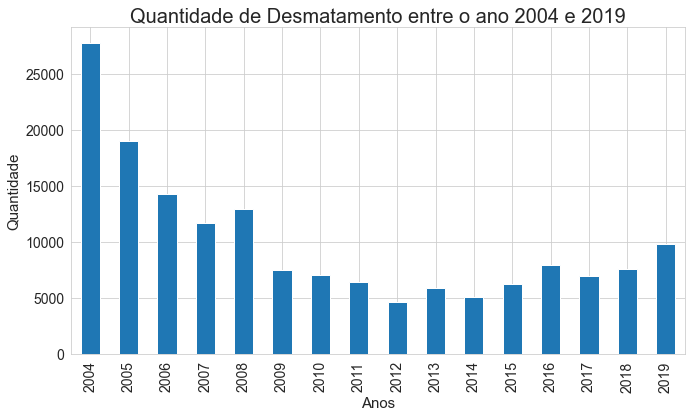

In [97]:
#Gráfico de linhas
print("Quantidade de Desmatamento Acre - entre 2004 e 2019")
grafico_barras_amz = df_desmatadas_rename['AMZ LEGAL - Desmatamento'].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento entre o ano 2004 e 2019", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

In [98]:
novo_df_queimadas_sum.tail()

,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS
Ano/Estados,,,,,,,,,
2015,13419.0,7475.0,5779.0,2936.0,17599.0,43164.0,13105.0,2452.0,509.0
2016,11173.0,4928.0,7684.0,2595.0,15836.0,29724.0,11462.0,3870.0,489.0
2017,11685.0,5896.0,6295.0,1946.0,18143.0,49770.0,11298.0,1565.0,841.0
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.0,10253.0,2383.0,281.0
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.0,11206.0,4775.0,247.0


In [ ]:
novo_df_queimadas_sum.plot()

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

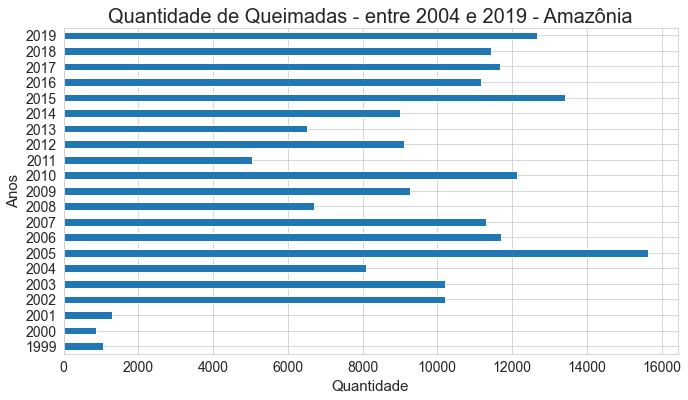

In [112]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['AM - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Amazônia", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

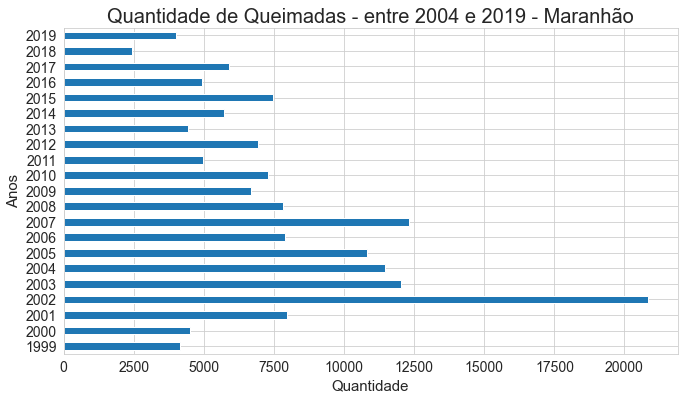

In [113]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['MA - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Maranhão", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

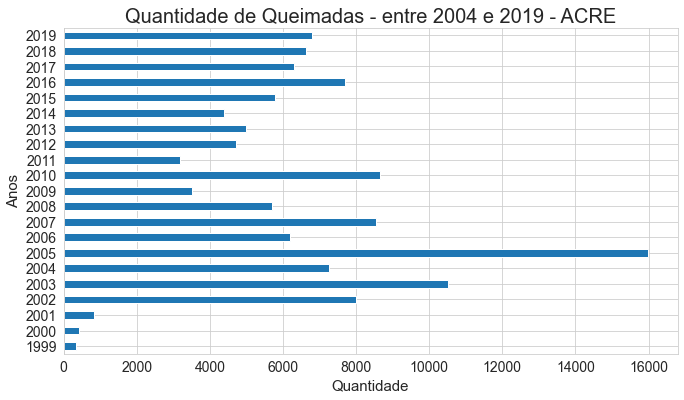

In [114]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['AC - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - ACRE", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Queimadas')

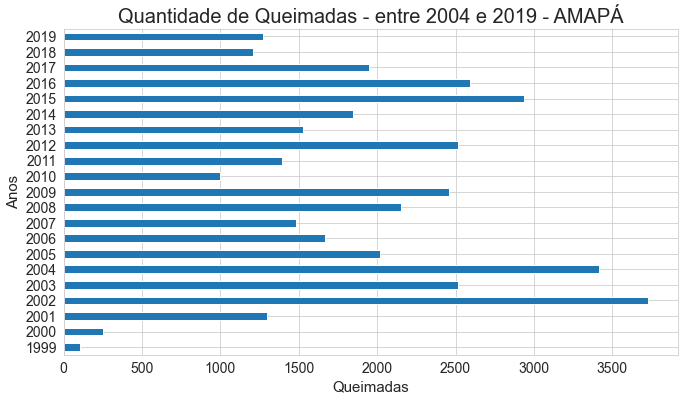

In [115]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['AP - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - AMAPÁ", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Queimadas",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

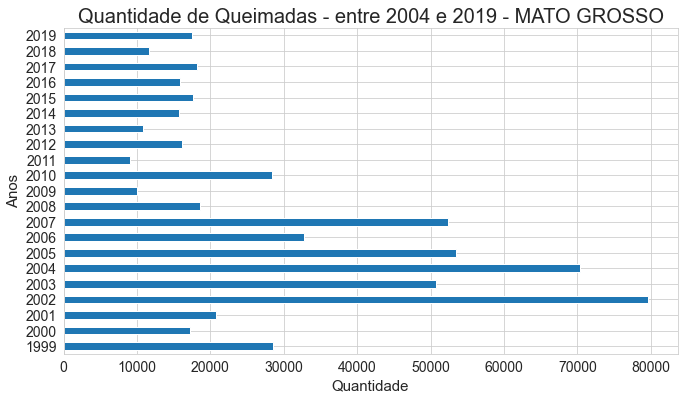

In [116]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['MT - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - MATO GROSSO", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

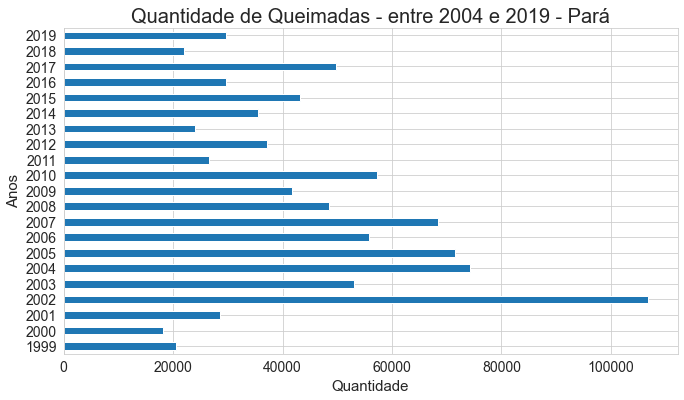

In [117]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['PA - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Pará", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

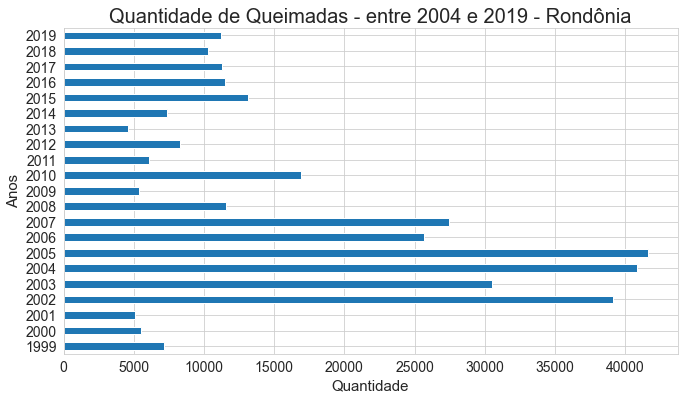

In [118]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['RO - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Rondônia", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

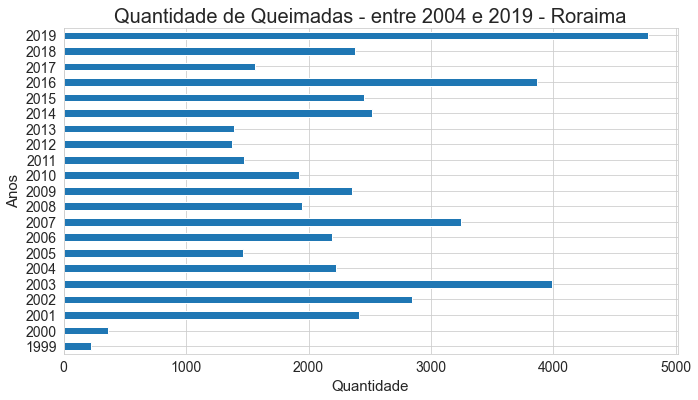

In [120]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['RR - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Roraima", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

Quantidade de Queimadas - entre 2004 e 2019


Text(0.5, 0, 'Quantidade')

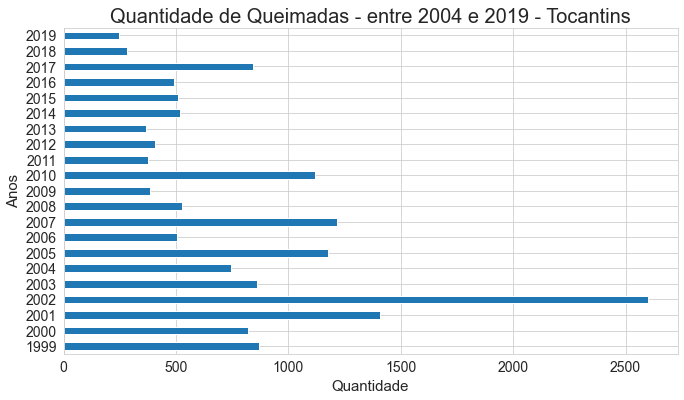

In [121]:
print("Quantidade de Queimadas - entre 2004 e 2019")
grafico_barras_amz = novo_df_queimadas_sum['TO - QTD QUEIMADAS'].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Queimadas - entre 2004 e 2019 - Tocantins", fontsize = 20)
grafico_barras_amz.set_ylabel("Anos",fontsize=15)
grafico_barras_amz.set_xlabel("Quantidade",fontsize=15)

In [204]:
#plt.plot(novo_df_queimadas_sum.index,novo_df_queimadas_sum['TO - QTD QUEIMADAS'],novo_df_queimadas_sum['RR - QTD QUEIMADAS'])
#plt.legend(novo_df_queimadas_sum.columns)
#plt.xlabel(novo_df_queimadas_sum.index.name)
#plt.show()

In [205]:
#novo_df_queimadas_sum

In [206]:
#novo_df_queimadas_sum.loc[pd.Index([2000], name="Ano/Estados")]

In [234]:
df_desmatadas_rename

,AC - Desmatamento,AM - Desmatamento,AP - Desmatamento,MA - Desmatamento,MT - Desmatamento,PA - Desmatamento,RO - Desmatamento,RR - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
Ano/Estados,,,,,,,,,,
2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
2007,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
2008,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0
2009,167.0,405.0,70.0,828.0,1049.0,4281.0,482.0,121.0,61.0,7464.0
2010,259.0,595.0,53.0,712.0,871.0,3770.0,435.0,256.0,49.0,7000.0
2011,280.0,502.0,66.0,396.0,1120.0,3008.0,865.0,141.0,40.0,6418.0
2012,305.0,523.0,27.0,269.0,757.0,1741.0,773.0,124.0,52.0,4571.0


Quantidade de Desmatamento Acre - entre 2004 e 2019


Text(0.5, 0, 'Anos')

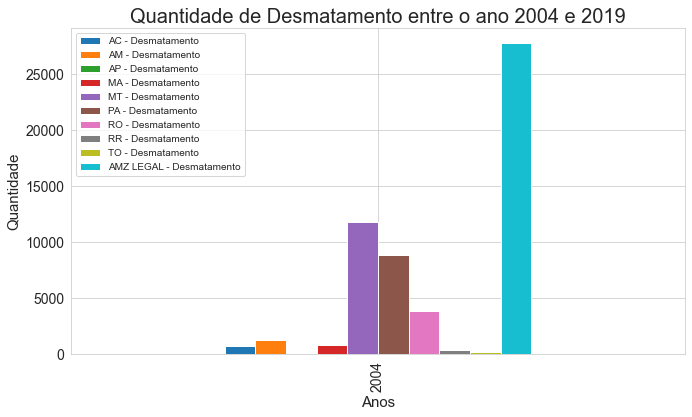

Text(0.5, 0, 'Anos')

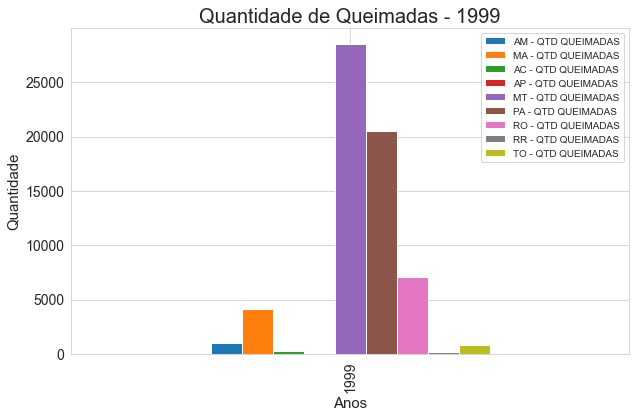

In [208]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([1999], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 1999", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

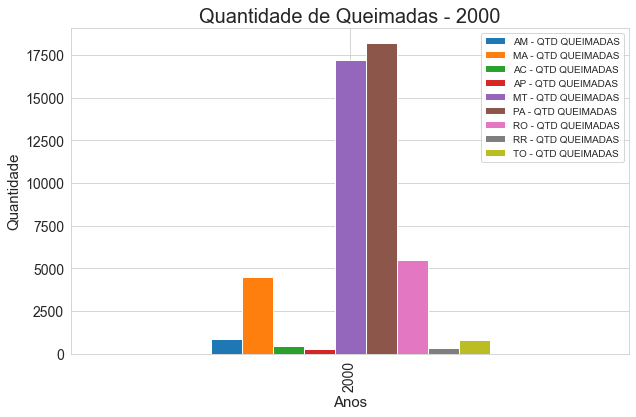

In [209]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2000], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2000", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

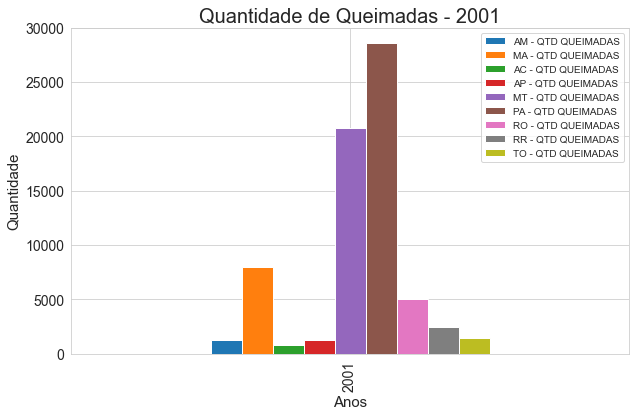

In [210]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2001], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2001", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

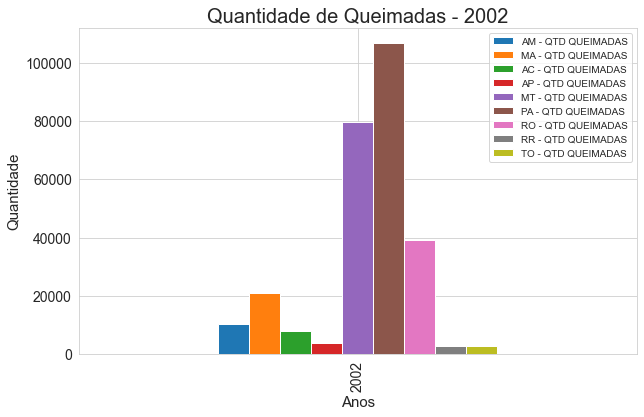

In [211]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2002], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2002", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

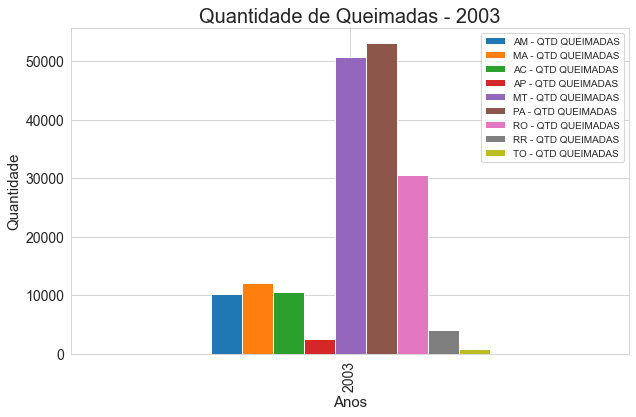

In [212]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2003], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2003", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

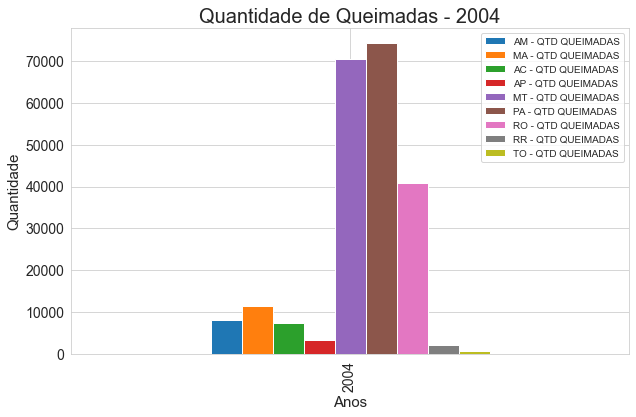

In [213]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2004], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2004", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2004


Text(0.5, 0, 'Anos')

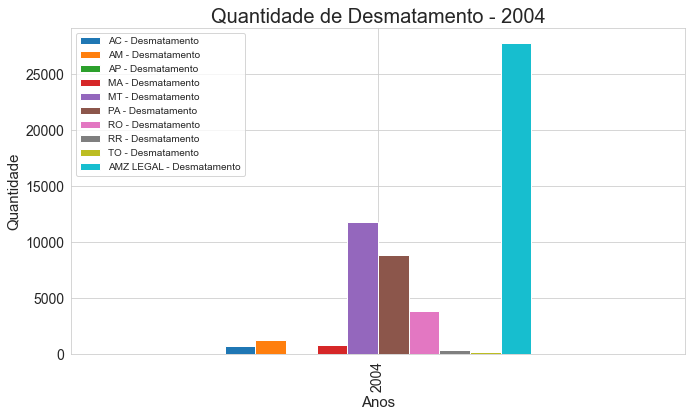

In [239]:
print("Quantidade de Desmatamento - 2004")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2004], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2004", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

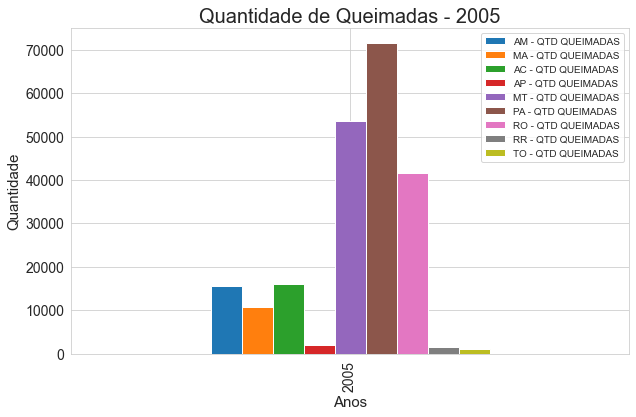

In [214]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2005], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2005", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2004


Text(0.5, 0, 'Anos')

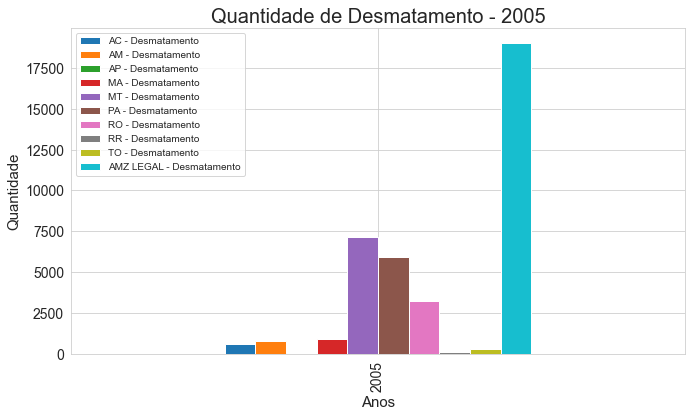

In [249]:
print("Quantidade de Desmatamento - 2004")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2005], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2005", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2006


Text(0.5, 0, 'Anos')

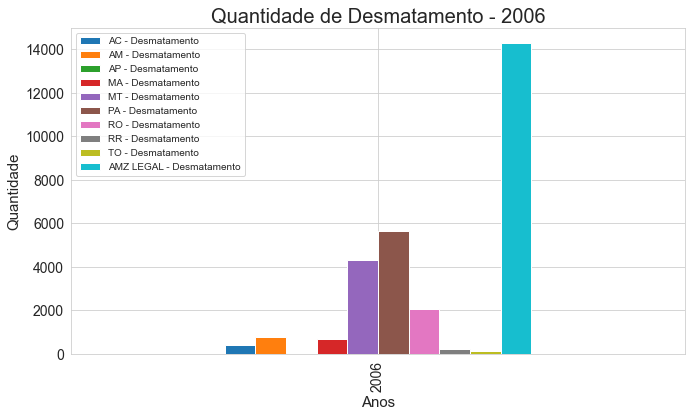

In [251]:
print("Quantidade de Desmatamento - 2006")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2006], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2006", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

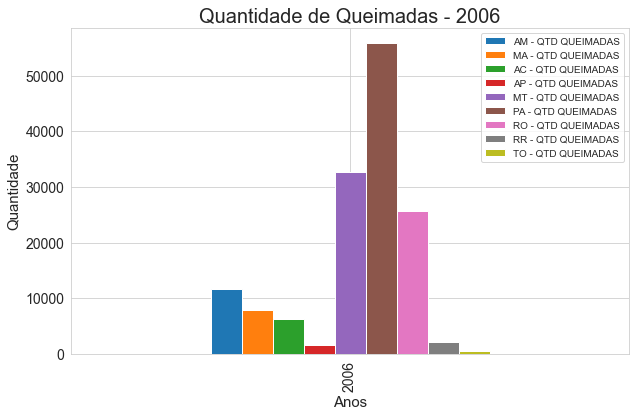

In [215]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2006], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2006", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

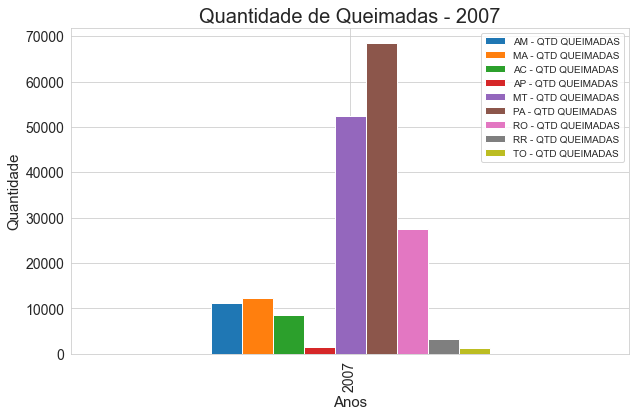

In [216]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2007], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2007", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2007


Text(0.5, 0, 'Anos')

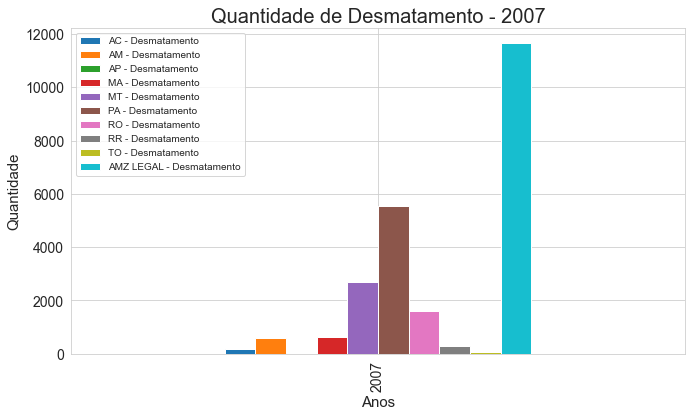

In [253]:
print("Quantidade de Desmatamento - 2007")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2007], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2007", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

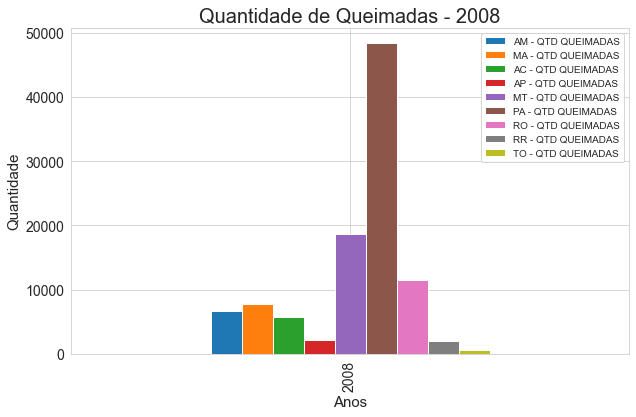

In [217]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2008], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2008", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2008


Text(0.5, 0, 'Anos')

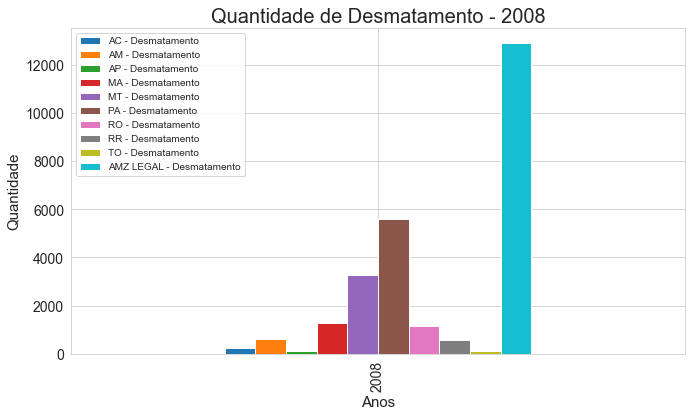

In [255]:
print("Quantidade de Desmatamento - 2008")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2008], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2008", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

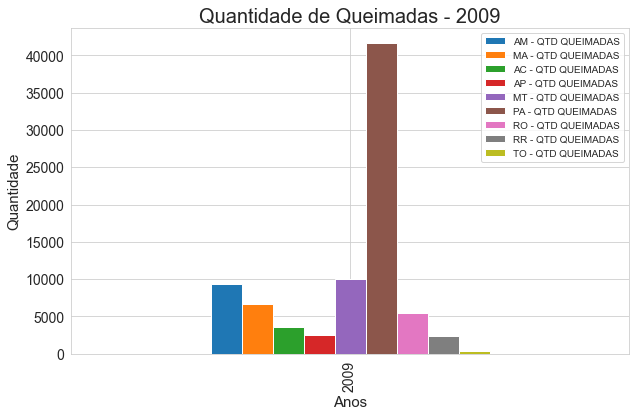

In [218]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2009], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2009", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2009


Text(0.5, 0, 'Anos')

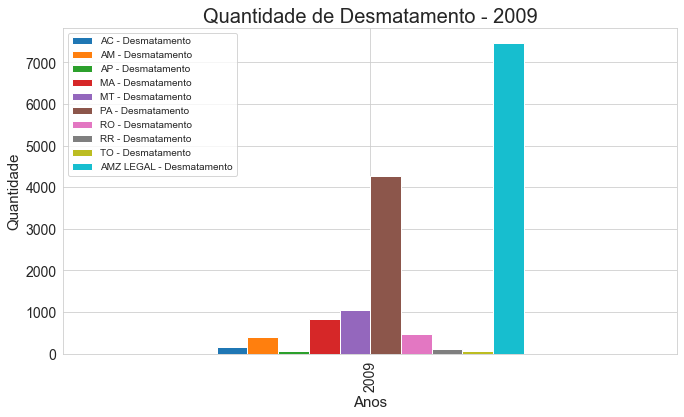

In [256]:
print("Quantidade de Desmatamento - 2009")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2009], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2009", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

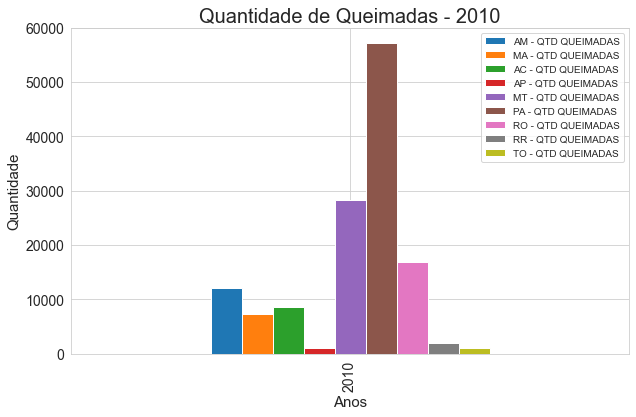

In [219]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2010], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2010", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2010


Text(0.5, 0, 'Anos')

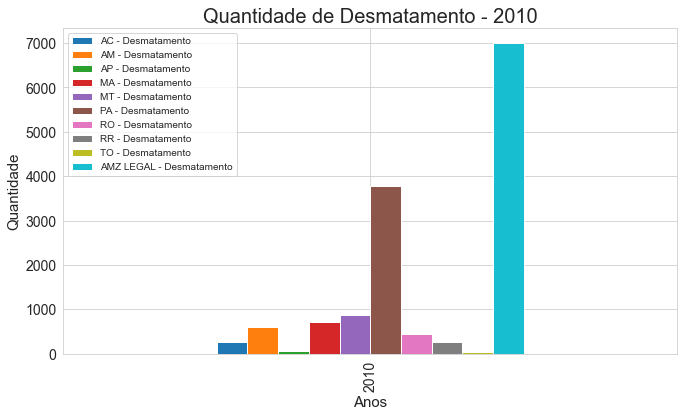

In [257]:
print("Quantidade de Desmatamento - 2010")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2010], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2010", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

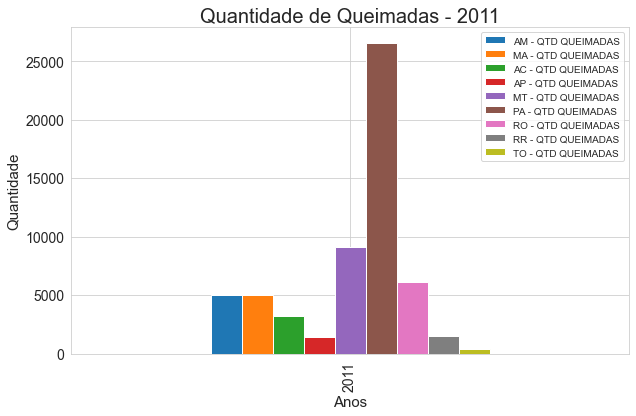

In [220]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2011], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2011", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2011


Text(0.5, 0, 'Anos')

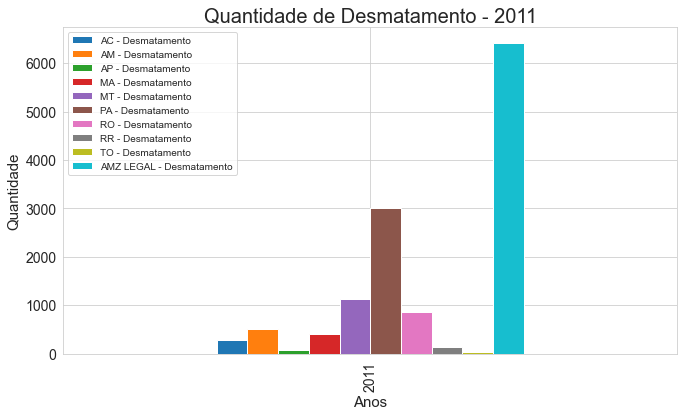

In [258]:
print("Quantidade de Desmatamento - 2011")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2011], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2011", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

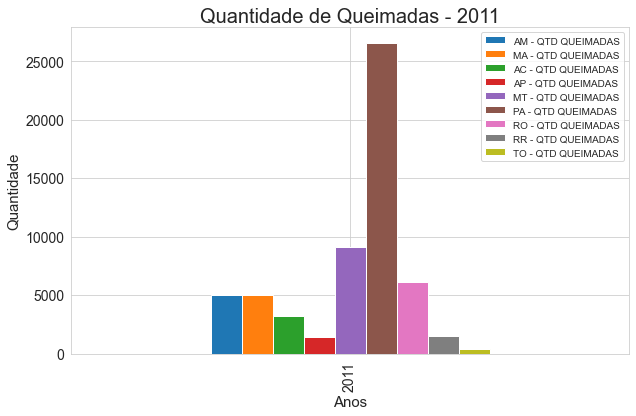

In [221]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2011], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2011", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

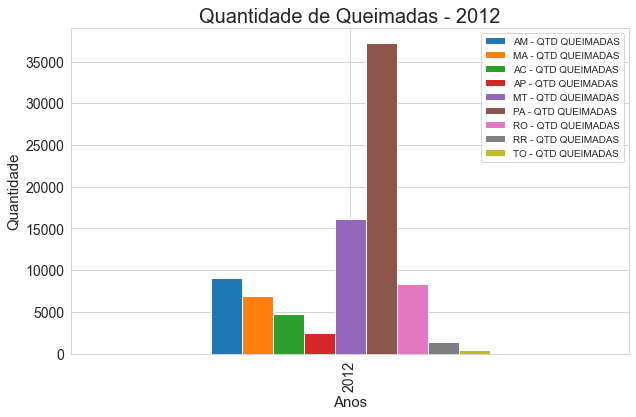

In [222]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2012], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2012


Text(0.5, 0, 'Anos')

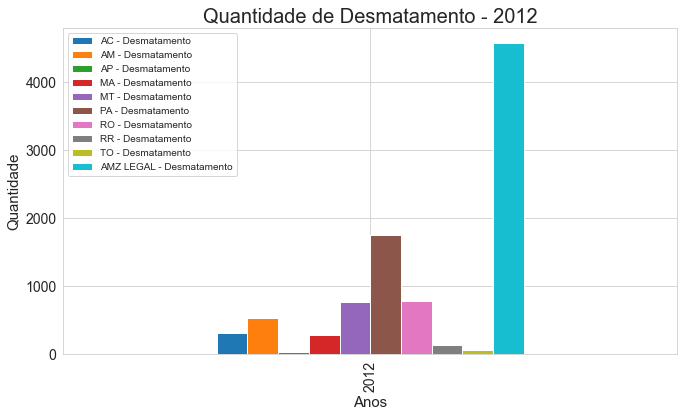

In [261]:
print("Quantidade de Desmatamento - 2012")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2012], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

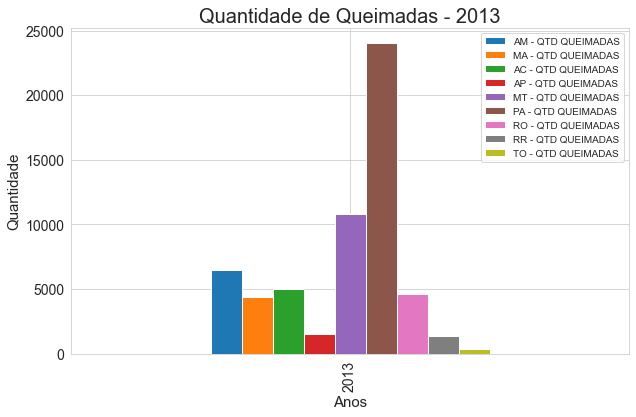

In [223]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2013], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2013", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2013


Text(0.5, 0, 'Anos')

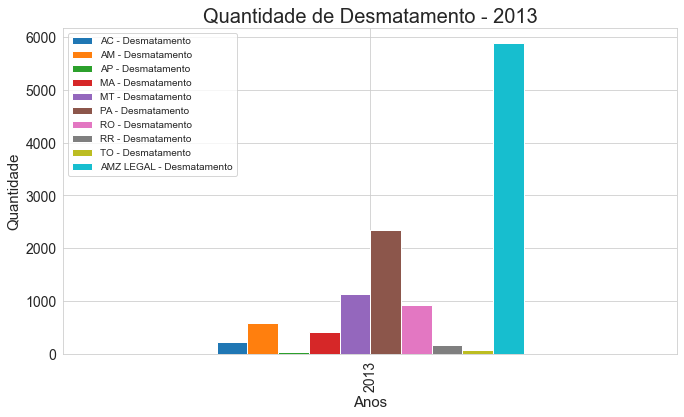

In [262]:
print("Quantidade de Desmatamento - 2013")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2013], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2013", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

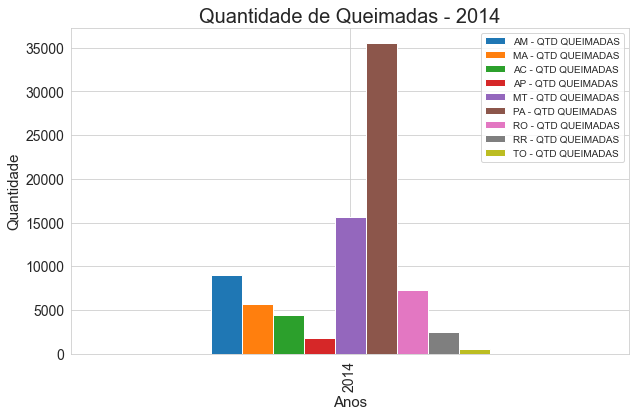

In [224]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2014], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2014", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2014


Text(0.5, 0, 'Anos')

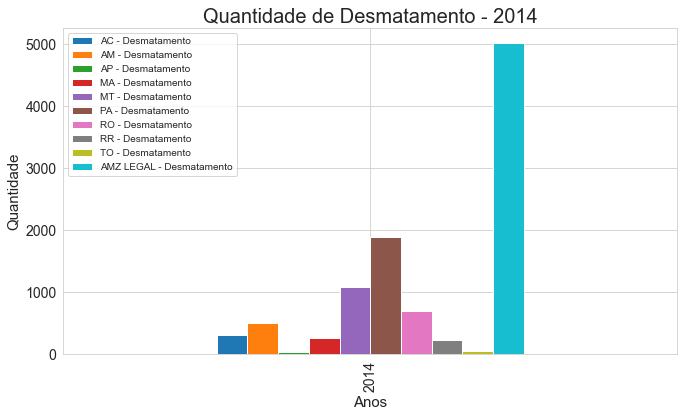

In [263]:
print("Quantidade de Desmatamento - 2014")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2014], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2014", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

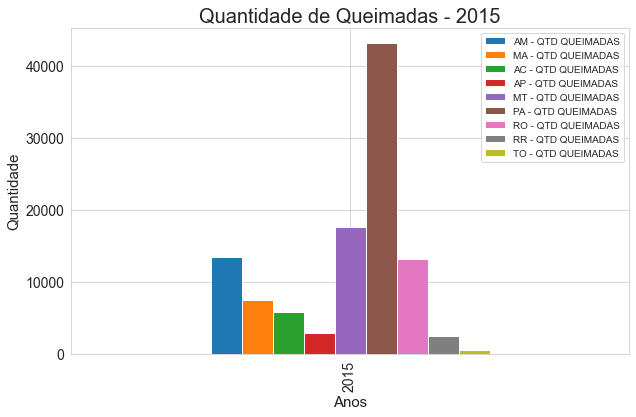

In [225]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2015], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2015", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Desmatamento - 2015


Text(0.5, 0, 'Anos')

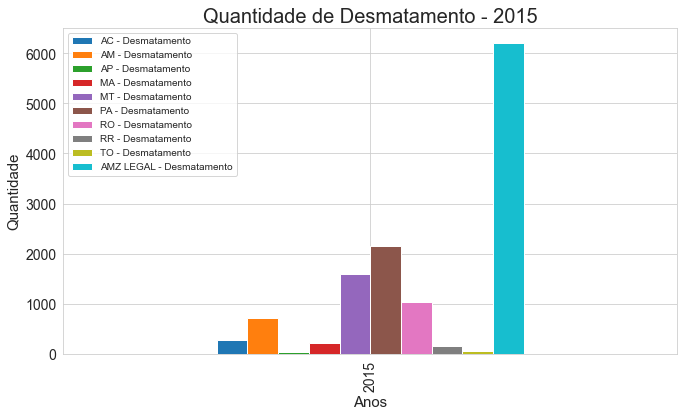

In [264]:
print("Quantidade de Desmatamento - 2015")
grafico_barras_amz = df_desmatadas_rename.loc[pd.Index([2015], name="Ano/Estados")].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Quantidade de Desmatamento - 2015", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

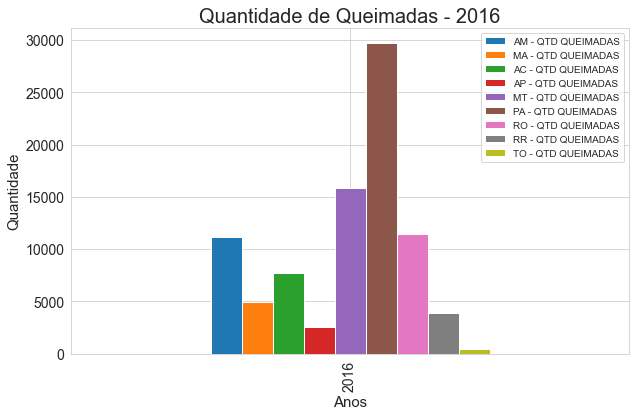

In [226]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2016], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2016", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

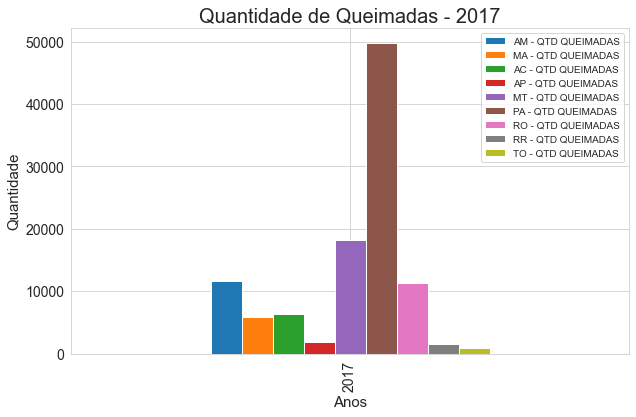

In [227]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2017], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2017", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

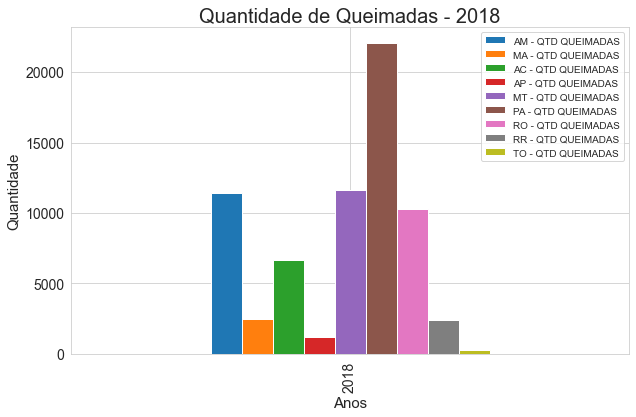

In [228]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2018], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2018", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Text(0.5, 0, 'Anos')

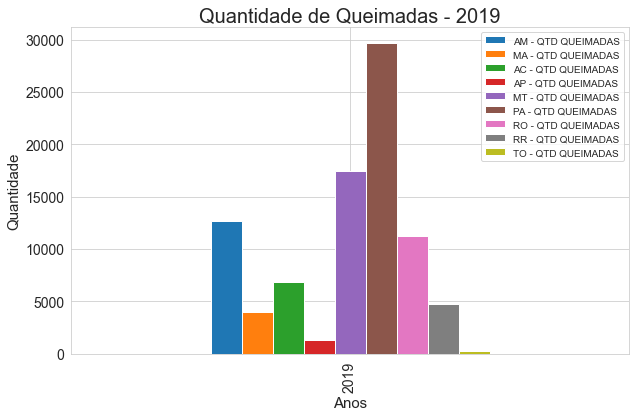

In [229]:
grafico_barras_amz = novo_df_queimadas_sum.loc[pd.Index([2019], name="Ano/Estados")].plot(kind='bar', figsize = (10,6),fontsize=14);
grafico_barras_amz.set_title("Quantidade de Queimadas - 2019", fontsize = 20)
grafico_barras_amz.set_ylabel("Quantidade",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

In [ ]:
#Gráfico de barras
#df_desmatadas_rename.plot(kind='bar')
#faixa_desmatamento = ['0 - 10','10-100']

In [ ]:
df_desmatadas_rename['AC - Desmatamento'].plot(kind='bar')
#plt.bar(faixa_desmatamento,df_desmatadas_rename,color = 'red')

In [ ]:
df_desmatadas_rename['AM - Desmatamento'].plot(kind='bar')
#plt.bar(faixa_desmatamento,df_desmatadas_rename,color = 'red')

In [ ]:
cor = ['salmon']    
novo_df_queimadas_sum['AM - QTD QUEIMADAS'].plot(kind='barh',color = cor)

In [ ]:
cor = ['salmon']    
novo_df_queimadas_sum['AP - QTD QUEIMADAS'].plot(kind='barh',color = cor)

In [ ]:
#trocar cor do gráfico
cor = ['salmon']
df_desmatadas_rename.plot(color = cor)

In [ ]:
plt.pie(novo_df_queimadas_sum['AP - QTD QUEIMADAS'],labels=novo_df_queimadas_sum.index,autopct = '%1.1f%%')

In [ ]:
#Preparação dos dados


In [268]:
dados_treinos = pd.read_csv("novodataframe.csv")

In [269]:
#features    
x_train = dados_treinos.drop(['Ano/Estados','AM - QTD QUEIMADAS'],axis=1)
#variáveis resposta
y_train = dados_treinos['AM - QTD QUEIMADAS'].copy()

In [270]:
x_train.tail()

,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AC - Desmatamento,AM - Desmatamento,AP - Desmatamento,MA - Desmatamento,MT - Desmatamento,PA - Desmatamento,RO - Desmatamento,RR - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
11,7475.0,5779.0,2936.0,17599.0,43164.0,13105.0,2452.0,509.0,264.0,712.0,25.0,209.0,1601.0,2153.0,1030.0,156.0,57.0,6207.0
12,4928.0,7684.0,2595.0,15836.0,29724.0,11462.0,3870.0,489.0,372.0,1129.0,17.0,258.0,1489.0,2992.0,1376.0,202.0,58.0,7893.0
13,5896.0,6295.0,1946.0,18143.0,49770.0,11298.0,1565.0,841.0,257.0,1001.0,24.0,265.0,1561.0,2433.0,1243.0,132.0,31.0,6947.0
14,2449.0,6626.0,1206.0,11621.0,22080.0,10253.0,2383.0,281.0,444.0,1045.0,24.0,253.0,1490.0,2744.0,1316.0,195.0,25.0,7536.0
15,3989.0,6802.0,1272.0,17479.0,29700.0,11206.0,4775.0,247.0,688.0,1421.0,8.0,215.0,1685.0,3862.0,1245.0,617.0,21.0,9762.0


In [271]:
y_train.tail()

11    13419.0
12    11173.0
13    11685.0
14    11446.0
15    12665.0
Name: AM - QTD QUEIMADAS, dtype: float64

In [ ]:
#Modelo de Regressão

In [1]:
#Descrevendo o modelo    
model_lr = lm.LinearRegression()

NameError: name 'lm' is not defined

In [ ]:
#treinando o modelo
model_lr.fit(x_train,y_train)

In [ ]:
#predições

In [ ]:
pred = model_lr.predict(x_train)

In [ ]:
pred[0:100]

In [ ]:
#Performance Modelo

In [ ]:
df1 = dados_treinos.copy()

In [ ]:
df1['prediction'] = pred

In [ ]:
df1[['Ano/Estados','AM - QTD QUEIMADAS','prediction','error','error_abs','error_percent']]

In [ ]:
df1['error'] = df1['AM - QTD QUEIMADAS'] - df1['prediction']

In [ ]:
df1['error_abs'] = np.abs(df1['error'])
df1['error_percent'] = ((df1['AM - QTD QUEIMADAS'] - df1['prediction'])/df1['AM - QTD QUEIMADAS'])
df1['error_perc_abs'] = np.abs(df1['error_percent'])

In [ ]:
mae = np.mean(df1['error_abs'])

In [ ]:
print('Mape: {}'.format(mae))

In [ ]:
np.mean(df1['error_abs'])